# Steam Game Quality Classification

# Table of Contents


- [Business Goal](#section_a)
- [Data preparation](#section_b)
- [1. Data Understanding and Exploration](#section_1)
    - [1.1 Data Understanding](#section1)
    - [1.2 Data Exploration](#section_1.1)
- [2. Data cleaning](#section_2)
    - [2.1 Remove duplicate or irrelevant observations](#section_2.1)
        - [Duplicate Values](#section_2.1.1)
        - [Irrelevant observations](#section_2.1.2)
    - [2.2 Fix structural errors](#section_2.2)
    - [2.3 Filter unwanted outliers](#section_2.3)
    - [2.4 Handle missing data](#section_2.4)
- [3. Data preparation](#section_3)
    - [3.1 Data Transformation](#section_3.1)
    - [3.2 Dataset Creation](#section_3.3)
        - [Hold Out](#section_3.3.1)
- [4. Model Building and Evaluation](#section_4)
    - [4.1 Random forest](#section_4.1)
        - [Initial Model](#section_4.1.1)
            - [Improving Accuracy](#section_4.1.2)
              - [Hyperparameter tuning](#section_4.1.2.1)
                  - [Tuning n_estimators](#section_4.1.2.1.1)
                  - [RandomSearchCV](#section_4.1.2.1.2)
                  - [Grid Search CV](#section_4.1.2.1.3)
            - [Feature Importance](#section_4.1.3)
            - [Permutation Importance](#section_4.1.31)
        - [Improved Model](#section_4.1.4)
            - [Feature tuning](#section_4.1.5)
            - [Feature Importance](#section_4.1.6)
            - [Permutation Importance](#section_4.1.7)
        - [Final Model](#section_4.1.8)
    - [4.2 SVM](#section_4.2)
      - [4.2.1 Feature Importance](#section_4.2.1)
    - [4.3 Naive bayes](#section_4.3)
- [5. Model Comparison](#section_5)
    - [5.1 Final Models & Evaluation](#section_5.1)
    - [5.2 Comparison](#section_5.2)
- [References](#ref)

<a id='section_a'></a>
# Business Goal
To buy or not to buy? We ask ourselves this question when choosing a particular product. One of the factors that can influence our decision are product reviews and ratings. In this project, we would like to determine which factors most affects the assignment of a positive or negative ratings to a video game on the Steam platform, as they have an effect on the commercial success of games.

**Goal :** To determine which features have the largest impact on whether a game receives a favourable rating on Steam.




<a id='section_b'></a>

# Data Preparation

To start working on the project we have to import all necessary python libraries which are used for working with dataframes, math operations, visualisations as well as for building ML models.

In [ ]:
#Import Pandas and numpy
import pandas as pd
import numpy as np

# Standard modules 
import itertools
import operator
import re
import statistics
import requests
import io

from sklearn.model_selection import cross_validate
from sklearn.inspection import permutation_importance

# Import sklearn tools
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Import preprocessing elements
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

#Import modules for Logistic Regression and Evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Import Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

#Import modules for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn.calibration import CalibratedClassifierCV

#Setting display options 

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

<a id='section_1'></a>

# 1 . Data Understanding and Exploration

The dataset we choose, consists of around 27000 records of video games. The data was  gathered from the Steam Store and SteamSpy APIs, and contains 18 columns.

Dataset - Kaggle.com, 2019, "Steam Store Games" viewed 11 April, 2021, https://www.kaggle.com/nikdavis/steam-store-games

<a id='section1'></a>
## 1.1 Data Understanding

In [ ]:
#Importing the dataset

#df = pd.read_csv('steam.csv')

#Importing the dataset for shared online notebook

url = 'https://drive.google.com/file/d/1VXQhLZ-pM_10fGn-yx8Gj8BYeRceDybK/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27075 non-null  object 
 5   publisher         27075 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

As we can see, the dataframe columns contain different data types. For the project purpose we define "positive_ratings" and "negative_ratings" our dependent variables. Some of the rest columns are gonna be used as independent variabels and will be converted into numeric values in later stages.

In [ ]:
df.describe()

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
count,2.707500e+04,27075.000000,27075.000000,27075.000000,2.707500e+04,27075.000000,27075.000000,27075.00000,27075.000000
mean,5.962035e+05,0.981127,0.354903,45.248864,1.000559e+03,211.027147,149.804949,146.05603,6.078193
std,2.508942e+05,0.136081,2.406044,352.670281,1.898872e+04,4284.938531,1827.038141,2353.88008,7.874922
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,4.012300e+05,1.000000,0.000000,0.000000,6.000000e+00,2.000000,0.000000,0.00000,1.690000
50%,5.990700e+05,1.000000,0.000000,7.000000,2.400000e+01,9.000000,0.000000,0.00000,3.990000
75%,7.987600e+05,1.000000,0.000000,23.000000,1.260000e+02,42.000000,0.000000,0.00000,7.190000
max,1.069460e+06,1.000000,18.000000,9821.000000,2.644404e+06,487076.000000,190625.000000,190625.00000,421.990000


In [ ]:
df.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [ ]:
df.isnull().sum()#checking for missing values

appid               0
name                0
release_date        0
english             0
developer           0
publisher           0
platforms           0
required_age        0
categories          0
genres              0
steamspy_tags       0
achievements        0
positive_ratings    0
negative_ratings    0
average_playtime    0
median_playtime     0
owners              0
price               0
dtype: int64

It is seen that our data set does not contain any missing values.

In [ ]:
#pip install plotly==4.14.3

In [ ]:
column = df["positive_ratings"]
max_value = column.max()
min_value = column.min()
print(max_value)
print(min_value)

2644404
0


The highest positive rating of a game consists of more than 2.6 million positive votes.

In [ ]:
import plotly.express as px
def year(df):
    if df<=100:
        return "Not the best"
    if df>100 and df<=500:
        return "Average"
    if df>500 and df<=1000:
        return "Good"
    if df>1000 and df<=5000:
        return "Very good"
    if df>5000 and df<=10000:
        return "Exccelent"
    if df>10000 and df<=100000:
        return "Excellent + "
    else:
        return "The best"
df['Number of positive ratings'] = df['positive_ratings'].apply(year)
px.pie(data_frame = df, names = 'Number of positive ratings', hole = 0.5, title = 'Structure of positive ratings')

The pie chart above reveals that the vast majority of video games (72.3%) have "Not the best" ratings, other words they are poorly rated.

In [ ]:
column1 = df["negative_ratings"]
max_value1 = column1.max()
min_value1 = column1.min()
print(max_value1)
print(min_value1)

487076
0


The highest negative rating of a game consists of les than 0.5 million negative votes.

In [ ]:
def neg(df):
    if df<=50:
        return "< 50"
    if df>50 and df<=100:
        return "50 - 100"
    if df>100 and df<=500:
        return "100 - 500"
    if df>500 and df<=1000:
        return "500 - 1000"
    if df>1000 and df<=2000:
        return "1000 - 2000"
    if df>2000 and df<=5000:
        return "2000 - 5000"
    else:
        return "> 5000"
df['Number of negative ratings'] = df['negative_ratings'].apply(neg)
px.pie(data_frame = df, names = 'Number of negative ratings', hole = 0.5, title = 'Structure of negative ratings')

The same situation we can notice above - the majority of video games recieved only "few"(<50) negative ratings.

In [ ]:
# english: 1 for English 0 for other languages
# The majority of records are English
df['english'].astype('category').value_counts()

1    26564
0      511
Name: english, dtype: int64

In [ ]:
# platforms: A listing of the operating systems the entry will run on
# Most entries will run on windows, only 4 out of 27075 won't
df['platforms'].astype('category').value_counts()

windows              18398
windows;mac;linux     4623
windows;mac           3439
windows;linux          610
mac                      3
mac;linux                1
linux                    1
Name: platforms, dtype: int64

In [ ]:
df['required_age'].astype('category').value_counts()

0     26479
18      308
16      192
12       73
7        12
3        11
Name: required_age, dtype: int64

Most games don't require the minimum age.

In [ ]:
df['genres'].astype('category').value_counts()

Action;Indie                                                                                                                                                  1852
Casual;Indie                                                                                                                                                  1482
Action;Adventure;Indie                                                                                                                                        1229
Adventure;Indie                                                                                                                                               1170
Action;Casual;Indie                                                                                                                                           1004
                                                                                                                                                              ... 
Gore;Action;Adventure;

From the list above we can understand which game genre are predominante on the platform.

In [ ]:
df[df['price']==df['price'].max()]

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,Number of positive ratings,Number of negative ratings
21105,821800,ADR-Labelling Game,2018-04-12,1,Suomen Kuljetusturva Oy,Suomen Kuljetusturva Oy,windows,0,Single-player,Simulation,Simulation;Difficult,0,1,0,0,0,0-20000,421.99,Not the best,< 50


The most expensive game on the platform has only 1 positive and 0 negative ratings.

In [ ]:
df[df['price']==df['price'].min()]

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,Number of positive ratings,Number of negative ratings
11,280,Half-Life: Source,2004-06-01,1,Valve,Valve,windows;mac;linux,0,Single-player,Action,FPS;Action;Sci-fi,0,3767,1053,190,214,2000000-5000000,0.0,Very good,1000 - 2000
14,340,Half-Life 2: Lost Coast,2005-10-27,1,Valve,Valve,windows;mac;linux,0,Single-player;Commentary available,Action,FPS;Action;Singleplayer,0,5783,1020,46,29,10000000-20000000,0.0,Exccelent,1000 - 2000
15,360,Half-Life Deathmatch: Source,2006-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,Action;FPS;Multiplayer,0,1362,473,102,81,5000000-10000000,0.0,Very good,100 - 500
19,440,Team Fortress 2,2007-10-10,1,Valve,Valve,windows;mac;linux,0,Multi-player;Cross-Platform Multiplayer;Steam ...,Action;Free to Play,Free to Play;Multiplayer;FPS,520,515879,34036,8495,623,20000000-50000000,0.0,The best,> 5000
22,570,Dota 2,2013-07-09,1,Valve,Valve,windows;mac;linux,0,Multi-player;Co-op;Steam Trading Cards;Steam W...,Action;Free to Play;Strategy,Free to Play;MOBA;Strategy,0,863507,142079,23944,801,100000000-200000000,0.0,The best,> 5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27026,1056710,VTB Basketball League VR,2019-04-12,0,Axyos Games,LikeVR,windows,0,Single-player,Casual;Free to Play;Sports,Free to Play;Casual;Sports,0,3,0,0,0,0-20000,0.0,Not the best,< 50
27029,1057420,Earthshakers,2019-04-22,1,"Kaleido, Inc.","Kaleido, Inc.",windows,0,Single-player,Action;Free to Play;Indie,Action;Indie;Free to Play,0,3,7,0,0,0-20000,0.0,Not the best,< 50
27030,1057430,Geometry May. I swear it's a nice free game,2019-04-16,1,PixelGreeds,PixelGreeds,windows,0,Single-player;Steam Achievements;Full controll...,Action;Adventure;Free to Play;Indie,Nudity;Sexual Content;Free to Play,7,83,15,0,0,0-20000,0.0,Not the best,< 50
27034,1057690,Sin Slayers: The First Sin,2019-04-11,1,goonswarm,Black Tower Entertainment,windows,0,Single-player;Partial Controller Support,Adventure;Free to Play;Indie;RPG;Strategy,RPG;Indie;Adventure,0,101,29,0,0,20000-50000,0.0,Average,< 50


From the table above we can see a lot of free games (with no price) have many positive ratings.

<a id='section_1.1'></a>

## 1.2 Data Exploration

In [ ]:
#Cleaning up from data understanding visualisations
del df['Number of positive ratings']
del df['Number of negative ratings']

In [ ]:
# all numeric (float and int) variables in the dataset
orig_numeric = df.select_dtypes(include=['float64', 'int64', 'int32'])
orig_numeric.head()

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
0,10,1,0,0,124534,3339,17612,317,7.19
1,20,1,0,0,3318,633,277,62,3.99
2,30,1,0,0,3416,398,187,34,3.99
3,40,1,0,0,1273,267,258,184,3.99
4,50,1,0,0,5250,288,624,415,3.99


By only examining the numeric data we're losing a lot of relevant information which may impact on our classification e.g. developer, publisher and genre. We're also losing out on the release date and the number of owners. While the positive and negative ratings are present they don't reveal much useful information. We're also including useless information like appid which is a hidden attribute. 

In [ ]:
#Removing appid and english

del orig_numeric['appid']
del orig_numeric['english']
orig_numeric.head()

,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
0,0,0,124534,3339,17612,317,7.19
1,0,0,3318,633,277,62,3.99
2,0,0,3416,398,187,34,3.99
3,0,0,1273,267,258,184,3.99
4,0,0,5250,288,624,415,3.99


In [ ]:
# paiwise scatter plot

#This takes a long time

#plt.figure(figsize=(20, 10))
#sns.pairplot(orig_numeric)
#plt.show()

In [ ]:
# correlation matrix
cor = orig_numeric.corr()
cor

,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
required_age,1.000000,-0.005459,0.060418,0.057599,0.034423,0.014748,0.120358
achievements,-0.005459,1.000000,0.006058,0.003578,0.014175,0.009957,-0.007996
positive_ratings,0.060418,0.006058,1.000000,0.762804,0.157898,0.035776,0.036110
negative_ratings,0.057599,0.003578,0.762804,1.000000,0.161140,0.047887,0.051259
average_playtime,0.034423,0.014175,0.157898,0.161140,1.000000,0.914900,0.049242
median_playtime,0.014748,0.009957,0.035776,0.047887,0.914900,1.000000,0.036610
price,0.120358,-0.007996,0.036110,0.051259,0.049242,0.036610,1.000000


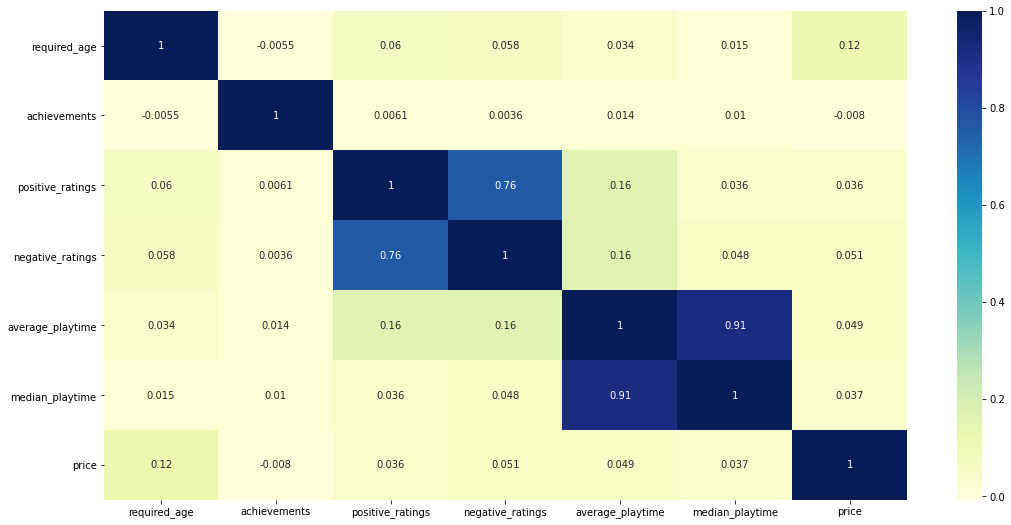

In [ ]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(18,9))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

<a id='section_2'></a>

# 2 . Data Cleaning

The dataset we're using seems relatively clean but we've outlined and conducted a general data-cleaning workflow below. 

<a id='section_2.1'></a>
## 2.1 Remove duplicate or irrelevant observations

Our data has no duplicate values. Though we quickly show to how to detect and remove them if it did. We do however have a number of irrelevant observations. 

<a id='section_2.1.1'></a>
### Duplicate values

In [ ]:
#Check for Duplicate values 

# Select duplicate rows except first occurrence 
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price


In [ ]:
#Remove duplicate values

#As can be seen from the last check we have no duplciate values in the data
#For demonstration purposes we'll add a duplicate record
  
# Creating duplicate record
falseRec = {"appid":1069460,"name":"Rune Lord","release_date":"24/04/2019","english":1,"developer":"Adept Studios GD",
                  "publisher":"Alawar Entertainment","platforms":"platforms","required_age":0,
                  "categories":"Single-player;Steam Cloud","genres":"Adventure;Casual;Indie",
                  "steamspy_tags":"Indie;Casual;Adventure","achievements":0,"positive_ratings":4,
                  "negative_ratings":0,"average_playtime":0,"median_playtime":0,"owners":"0-20000","price":5.19}
                    



In [ ]:
# Adding duplicate records

for i in range(1,5,1):
    df = df.append(falseRec,ignore_index=True)

In [ ]:
# Check for duplicates after insertion of dummy record
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
27076,1069460,Rune Lord,24/04/2019,1,Adept Studios GD,Alawar Entertainment,platforms,0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0,4,0,0,0,0-20000,5.19
27077,1069460,Rune Lord,24/04/2019,1,Adept Studios GD,Alawar Entertainment,platforms,0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0,4,0,0,0,0-20000,5.19
27078,1069460,Rune Lord,24/04/2019,1,Adept Studios GD,Alawar Entertainment,platforms,0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0,4,0,0,0,0-20000,5.19


In [ ]:
# Drop duplicate records 
df.drop_duplicates(subset=['appid'],keep=False,inplace=True)

#Verify there are no duplicate records
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price


<a id='section_2.1.2'></a>
### Irrelevant Observations

Here we remove any observations not germane to the business objective. We're only interested in games available in English and on the Windows platform so we'll remove any observations unrelated to that. We're also removing redundant features. appid is a unique numeric identifier on the Steam platform and has no informartional value for this problem. The steamspy_tags are equivalent to the genres and categories feature. 


In [ ]:
#Code below is based on code from https://nik-davis.github.io/posts/2019/steam-data-exploration/

def remove_non_english(df):
    # keep only rows marked as supporting english
    df = df[df['english'] == 1].copy()
    
    # keep rows which don't contain 3 or more non-ascii characters in succession
    df = df[~df['name'].str.contains('[^\u0001-\u007F]{3,}')]
    
    # remove english column, now redundant
    df.drop('english',inplace=True, axis=1)
    
    return df
    
# keep english only
df = remove_non_english(df)

In [ ]:
# Keep windows only, and remove platforms column
df = df[df['platforms'].str.contains('windows')].drop('platforms', axis=1).copy()

In [ ]:
#Dropping unneeded and redundant columns
df.drop(['appid','steamspy_tags'],inplace=True,axis=1)

<a id='section_2.2'></a>

## 2.2 Fix structural errors

Here we are checking for inconsistencies in the data e.g. odd naming conventions, typos, incorrect capitalization, incorrect datatypes, mislabeled categories etc. 

In [ ]:
column_n = df.columns
print(column_n)

# Get column data types
df.dtypes

Index(['name', 'release_date', 'developer', 'publisher', 'required_age',
       'categories', 'genres', 'achievements', 'positive_ratings',
       'negative_ratings', 'average_playtime', 'median_playtime', 'owners',
       'price'],
      dtype='object')


name                 object
release_date         object
developer            object
publisher            object
required_age          int64
categories           object
genres               object
achievements          int64
positive_ratings      int64
negative_ratings      int64
average_playtime      int64
median_playtime       int64
owners               object
price               float64
dtype: object

There are no problems with out feature names and datatypes. We will convert all our text to lower case to insure that non-standard capitalisation doesn't lead to any erroneous features. We will only be converting features we are planning to use later e.g. name will not be processed as it will be removed at a later stage. We will also convert our release_date feature explictly to the date time format. 

In [ ]:
#Converting case

df['developer'] = df['developer'].str.lower()
df['publisher'] = df['publisher'].str.lower()
df['categories'] = df['categories'].str.lower()
df['genres'] = df['genres'].str.lower()

In [ ]:
#Converting the release date into a date time format

df['release_date'] = df['release_date'].astype('datetime64[ns]')


<a id='section_2.3'></a>
## 2.3 Filter unwanted outliers

An outlier is in simple terms an observation that is unlike the others; "We will generally define outliers as samples that are exceptionally far from the mainstream of the data." (Kuhn, 2013) There are many reasons for an outlier ranging from simple error to data corruption to "true" outliers. When possible outliers are detected they need to be identified and considered, both for their possible causes and how they should be handled (Kazil et al.,2016)




In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26190 entries, 0 to 27073
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              26190 non-null  object        
 1   release_date      26190 non-null  datetime64[ns]
 2   developer         26190 non-null  object        
 3   publisher         26190 non-null  object        
 4   required_age      26190 non-null  int64         
 5   categories        26190 non-null  object        
 6   genres            26190 non-null  object        
 7   achievements      26190 non-null  int64         
 8   positive_ratings  26190 non-null  int64         
 9   negative_ratings  26190 non-null  int64         
 10  average_playtime  26190 non-null  int64         
 11  median_playtime   26190 non-null  int64         
 12  owners            26190 non-null  object        
 13  price             26190 non-null  float64       
dtypes: datetime64[ns](1), 

In [ ]:
df.describe([.01,.25, .5, .75,.99])

,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
count,26190.000000,26190.000000,2.619000e+04,26190.000000,26190.000000,26190.000000,26190.000000
mean,0.356243,46.331997,1.026983e+03,216.346086,150.583543,145.489156,6.043083
std,2.409793,358.499356,1.930563e+04,4356.426710,1835.918197,2350.135707,7.817626
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
1%,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,6.000000e+00,2.000000,0.000000,0.000000,1.690000
50%,0.000000,7.000000,2.400000e+01,9.000000,0.000000,0.000000,3.990000
75%,0.000000,23.000000,1.260000e+02,42.000000,0.000000,0.000000,7.190000
99%,18.000000,394.660000,1.557730e+04,2863.200000,2129.990000,1797.330000,31.100000
max,18.000000,9821.000000,2.644404e+06,487076.000000,190625.000000,190625.000000,421.990000


We can see that a number of our features have extreme outliers. The jump from the 99th percentile to the maximum in all columns other than required_age is considerable. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7aa2375a90>,
      dtype=object)

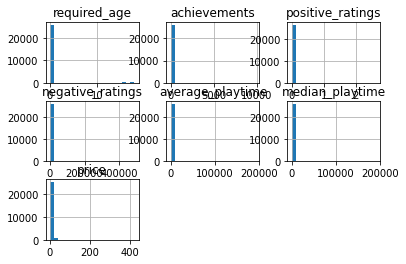

In [ ]:
df.hist(bins=20)

Looking at our histograms we can see that our numerical features are all heavily right skewed. As our data has a non-normal distribution we could use the Interquartile range method (Ilyas,2019) to remove outliers. 

"The IQR can be used to identify outliers by defining limits on the sample values that are a factor k of the IQR below the 25th percentile or above the 75th percentile. The common value for the factor k is the value 1.5."  (https://www.facebook.com/MachineLearningMastery, 2018)

We're going to have a look at using IQR for removing outliers in achievements,positive_ratings,negative_ratings,average_playtime,median_playtime and price.




‌


In [ ]:
#Code based on https://towardsdatascience.com/create-and-customize-boxplots-with-pythons-matplotlib-to-get-lots-of-insights-from-your-data-d561c9883643

to_check=['achievements','positive_ratings','negative_ratings','average_playtime','median_playtime','price']

def get_summary_statistics(dataset):
    
  sorted(dataset)
  Q1,Q3 = np.percentile(dataset , [25,75])
  IQR = Q3-Q1
  lower_range = Q1-(1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)

  mean = np.round(np.mean(dataset), 2)
  median = np.round(np.median(dataset), 2)
  min_value = np.round(dataset.min(), 2)
  max_value = np.round(dataset.max(), 2)

  print('Min: %s' % min_value)
  print('Mean: %s' % mean)
  print('Max: %s' % max_value)
  print('25th percentile: %s' % Q1)
  print('Median: %s' % median)
  print('75th percentile: %s' % Q3)
  print('Interquartile range (IQR): %s' % IQR)
  print('Lower cutoff: %s' % lower_range)
  print('Upper cutoff: %s' % upper_range)

for name in to_check:
  print(f"\nSummary for feature {name}.")
  get_summary_statistics(df[name])



Summary for feature achievements.
Min: 0
Mean: 46.33
Max: 9821
25th percentile: 0.0
Median: 7.0
75th percentile: 23.0
Interquartile range (IQR): 23.0
Lower cutoff: -34.5
Upper cutoff: 57.5

Summary for feature positive_ratings.
Min: 0
Mean: 1026.98
Max: 2644404
25th percentile: 6.0
Median: 24.0
75th percentile: 126.0
Interquartile range (IQR): 120.0
Lower cutoff: -174.0
Upper cutoff: 306.0

Summary for feature negative_ratings.
Min: 0
Mean: 216.35
Max: 487076
25th percentile: 2.0
Median: 9.0
75th percentile: 42.0
Interquartile range (IQR): 40.0
Lower cutoff: -58.0
Upper cutoff: 102.0

Summary for feature average_playtime.
Min: 0
Mean: 150.58
Max: 190625
25th percentile: 0.0
Median: 0.0
75th percentile: 0.0
Interquartile range (IQR): 0.0
Lower cutoff: 0.0
Upper cutoff: 0.0

Summary for feature median_playtime.
Min: 0
Mean: 145.49
Max: 190625
25th percentile: 0.0
Median: 0.0
75th percentile: 0.0
Interquartile range (IQR): 0.0
Lower cutoff: 0.0
Upper cutoff: 0.0

Summary for feature pric

Using IQR to remove our outliers would be a poor choice here as domain knowledge tells us that we would lose a lot of valid observations e.g. the cutoff for price is extremely low due to the disproportionate number of cheap titles on steam. But most commercial games release in the price range of €20-60. 

Similarly as the Steam API doesn't give direct access to players playtime the calculation of the average and median playtime statistics has a disproportionate number of zero's (~75% of the entries). Some sources (Jonduke, 2020) suggest that a games average playtime could be in the region of 25 liftime hours whereas others (SteamSpy - All the data about Steam games, 2020),(andersdrachen, 2014) suggest that for less popular games the average playtime is often less than tow hours (two hours playtime is Steam's refund time limit). 

(Kunal et. al, 2007) suggests that a capping and flooring approach, where we adjust values falling below the oneth percentile and above the ninety ninth, can work well with classification problems. 

However if we examine our features more closely, looking only at the highest values we can see that most features only have one or two extreme outliers. 


In [ ]:
ac = df.loc[df['achievements']>= df.achievements.quantile(.9999)]
ac.sort_values(by = 'achievements',ascending=False)


,name,release_date,developer,publisher,required_age,categories,genres,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
12604,LOGistICAL,2017-02-15,sacada,sacada,0,single-player;steam achievements;steam trading...,casual;indie;strategy,9821,125,35,0,0,50000-100000,6.99
14735,Drive-By Hero,2017-06-19,idea cabin,idea cabin,0,single-player;steam achievements,violent;gore;action;casual;indie;early access,5394,45,78,0,0,0-20000,1.59
20346,XORPLE,2018-02-20,red dolphin games,vt publishing,0,single-player;steam achievements,action;casual,5000,11,17,0,0,0-20000,3.99
20989,Eternal Man: Mountain,2018-04-06,eprodigy,advocatus,0,single-player;steam achievements,action;adventure;casual;indie,5000,7,5,0,0,0-20000,0.79
20583,Trivia Vault Basketball Trivia,2018-03-03,ripknot systems,ripknot systems,0,single-player;steam achievements,action;casual,5000,20,9,1,1,0-20000,9.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17038,Trivia Vault: Super Heroes Trivia 2,2017-09-12,ripknot systems,ripknot systems,0,single-player;steam achievements,action;casual;indie;simulation;strategy,5000,21,13,0,0,0-20000,9.99
16949,Destination Dungeon: Crypts of Warthallow,2017-09-07,virtual top,vt publishing,0,single-player;steam achievements,adventure;casual;indie;rpg,5000,18,17,0,0,0-20000,3.99
16836,Trivia Vault: Science & History Trivia 2,2017-09-01,ripknot systems,ripknot systems,0,single-player;steam achievements,action;casual;indie;simulation;strategy,5000,25,14,0,0,0-20000,9.99
16752,Yatsumitsu Fists of Wrath,2017-08-25,virtual top,vt publishing,0,single-player;steam achievements,action;adventure;casual;rpg,5000,15,23,0,0,0-20000,3.99


In [ ]:
pr = df.loc[df['positive_ratings']>= df.positive_ratings.quantile(.9999)]
pr.sort_values(by = 'positive_ratings',ascending=False)

,name,release_date,developer,publisher,required_age,categories,genres,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
25,Counter-Strike: Global Offensive,2012-08-21,valve;hidden path entertainment,valve,0,multi-player;steam achievements;full controlle...,action;free to play,167,2644404,402313,22494,6502,50000000-100000000,0.0
22,Dota 2,2013-07-09,valve,valve,0,multi-player;co-op;steam trading cards;steam w...,action;free to play;strategy,0,863507,142079,23944,801,100000000-200000000,0.0
19,Team Fortress 2,2007-10-10,valve,valve,0,multi-player;cross-platform multiplayer;steam ...,action;free to play,520,515879,34036,8495,623,20000000-50000000,0.0


In [ ]:
nr = df.loc[df['negative_ratings']>= df.negative_ratings.quantile(.9999)]
nr.sort_values(by = 'negative_ratings',ascending=False)

,name,release_date,developer,publisher,required_age,categories,genres,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
12836,PLAYERUNKNOWN'S BATTLEGROUNDS,2017-12-21,pubg corporation,pubg corporation,0,multi-player;online multi-player;stats,action;adventure;massively multiplayer,37,496184,487076,22938,12434,50000000-100000000,26.99
25,Counter-Strike: Global Offensive,2012-08-21,valve;hidden path entertainment,valve,0,multi-player;steam achievements;full controlle...,action;free to play,167,2644404,402313,22494,6502,50000000-100000000,0.00
22,Dota 2,2013-07-09,valve,valve,0,multi-player;co-op;steam trading cards;steam w...,action;free to play;strategy,0,863507,142079,23944,801,100000000-200000000,0.00


In [ ]:
ap = df.loc[df['average_playtime']>= df.average_playtime.quantile(.9999)]
ap.sort_values(by = 'average_playtime',ascending=False)

,name,release_date,developer,publisher,required_age,categories,genres,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
9201,The Abbey of Crime Extensum,2016-05-19,manuel pazos;daniel celemín,manuel pazos;daniel celemín,0,single-player,adventure;free to play,0,146,22,190625,190625,50000-100000,0.0
1478,The Banner Saga: Factions,2013-02-25,stoic,versus evil,0,multi-player;cross-platform multiplayer,free to play;indie;rpg;strategy,42,569,202,95245,190489,200000-500000,0.0
6014,The Secret of Tremendous Corporation,2015-10-12,sebastian krzyszkowiak;konrad burandt;paweł radej,dosowisko.net,0,single-player;captions available;steam cloud,adventure;casual;free to play;indie,0,218,50,95242,190445,100000-200000,0.0


In [ ]:
mp = df.loc[df['median_playtime']>= df.median_playtime.quantile(.9999)]
mp.sort_values(by = 'median_playtime',ascending=False)

,name,release_date,developer,publisher,required_age,categories,genres,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
9201,The Abbey of Crime Extensum,2016-05-19,manuel pazos;daniel celemín,manuel pazos;daniel celemín,0,single-player,adventure;free to play,0,146,22,190625,190625,50000-100000,0.0
1478,The Banner Saga: Factions,2013-02-25,stoic,versus evil,0,multi-player;cross-platform multiplayer,free to play;indie;rpg;strategy,42,569,202,95245,190489,200000-500000,0.0
6014,The Secret of Tremendous Corporation,2015-10-12,sebastian krzyszkowiak;konrad burandt;paweł radej,dosowisko.net,0,single-player;captions available;steam cloud,adventure;casual;free to play;indie,0,218,50,95242,190445,100000-200000,0.0


In [ ]:
pr = df.loc[df['price']>= df.price.quantile(.9999)]
pr.sort_values(by = 'price',ascending=False)

,name,release_date,developer,publisher,required_age,categories,genres,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
21105,ADR-Labelling Game,2018-04-12,suomen kuljetusturva oy,suomen kuljetusturva oy,0,single-player,simulation,0,1,0,0,0,0-20000,421.99
13062,GameMaker Studio 2 UWP,2017-03-08,yoyo games ltd.,yoyo games ltd.,0,in-app purchases,animation & modeling;design & illustration;edu...,0,1,0,0,0,0-20000,303.99
10034,Houdini Indie,2018-10-10,sidefx,sidefx,0,partial controller support;steam cloud,animation & modeling;design & illustration;gam...,0,23,0,0,0,0-20000,209.99


We can see that only a small number of unique observations constitue our biggest outliers. Some of these, such as the ones in price, will be removed by later data transformation but we'll remove them all now.

In [ ]:
#Removing outliers above the 9999th percentile

to_check=['achievements','positive_ratings','negative_ratings','average_playtime','median_playtime','price']

ogl = len(df)

for name in to_check:
  df = df[df[name] < df[name].quantile(.9999)]
  
print(f"{ogl-len(df)} records removed.\nOld number of observations {ogl}.\nNew number of observations {len(df)}")

113 records removed.
Old number of observations 26190.
New number of observations 26077


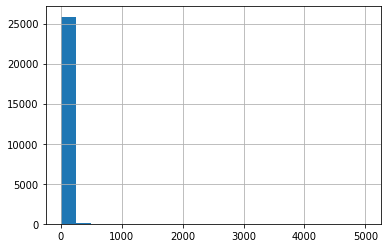

In [ ]:
df.achievements.hist(bins=20)


In [ ]:
for name in to_check:
  print(f"\nSummary for feature {name}.")
  get_summary_statistics(df[name])



Summary for feature achievements.
Min: 0
Mean: 27.51
Max: 4999
25th percentile: 0.0
Median: 7.0
75th percentile: 23.0
Interquartile range (IQR): 23.0
Lower cutoff: -34.5
Upper cutoff: 57.5

Summary for feature positive_ratings.
Min: 0
Mean: 840.86
Max: 363721
25th percentile: 6.0
Median: 25.0
75th percentile: 127.0
Interquartile range (IQR): 121.0
Lower cutoff: -175.5
Upper cutoff: 308.5

Summary for feature negative_ratings.
Min: 0
Mean: 167.45
Max: 77169
25th percentile: 2.0
Median: 9.0
75th percentile: 42.0
Interquartile range (IQR): 40.0
Lower cutoff: -58.0
Upper cutoff: 102.0

Summary for feature average_playtime.
Min: 0
Mean: 124.97
Max: 54618
25th percentile: 0.0
Median: 0.0
75th percentile: 0.0
Interquartile range (IQR): 0.0
Lower cutoff: 0.0
Upper cutoff: 0.0

Summary for feature median_playtime.
Min: 0
Mean: 113.41
Max: 54618
25th percentile: 0.0
Median: 0.0
75th percentile: 0.0
Interquartile range (IQR): 0.0
Lower cutoff: 0.0
Upper cutoff: 0.0

Summary for feature price.
Mi

<a id='section_2.4'></a>
##  2.4 Handle missing data

In [ ]:
#Check for NaN values
print('NaN check:')
print(df.isna().sum())

#Check for missing values

print('\nMissing values check:')
print(df.isnull().sum())

NaN check:
name                0
release_date        0
developer           0
publisher           0
required_age        0
categories          0
genres              0
achievements        0
positive_ratings    0
negative_ratings    0
average_playtime    0
median_playtime     0
owners              0
price               0
dtype: int64

Missing values check:
name                0
release_date        0
developer           0
publisher           0
required_age        0
categories          0
genres              0
achievements        0
positive_ratings    0
negative_ratings    0
average_playtime    0
median_playtime     0
owners              0
price               0
dtype: int64


In [ ]:
#As can be seen from the last check we have no missing values in the data
#For demonstration purposes we'll add a some records with missing values
  
# Creating incomplete
falseRec = {"name":"Rune Lord","release_date":"24/04/2019","developer":"Adept Studios GD",
                  "publisher":"Alawar Entertainment","required_age":0,
                  "categories":"Single-player;Steam Cloud","genres":"Adventure;Casual;Indie",
                "achievements":0,"positive_ratings":4,
                  "negative_ratings":0,"average_playtime":0,"median_playtime":0,"owners":"0-20000"}
                    



In [ ]:
# Adding incomplete records

for i in range(1,50,1):
    df = df.append(falseRec,ignore_index=True)
    
#Check for missing values
print('Missing values check:')
print(df.isnull().sum())

Missing values check:
name                 0
release_date         0
developer            0
publisher            0
required_age         0
categories           0
genres               0
achievements         0
positive_ratings     0
negative_ratings     0
average_playtime     0
median_playtime      0
owners               0
price               49
dtype: int64


At this point we would need to examine the type of data that is missing. We would need to take a look at possible reasons for the missing data i.e. was it an issue with how we sourced/produced the data, was it an error in the original data, etc. If the data in question was optional it might be natural for it to have missing values. 

After that we would need to decide how to deal with the data, which comes down to deleting incomplete observations or replacing the data. In this instance we will be deleting any rows with missing values. 

In [ ]:
#Drop any rows that have missing data in any column
df.dropna(inplace=True)

#Check for missing values
print('Missing values check:')
print(df.isnull().sum())

Missing values check:
name                0
release_date        0
developer           0
publisher           0
required_age        0
categories          0
genres              0
achievements        0
positive_ratings    0
negative_ratings    0
average_playtime    0
median_playtime     0
owners              0
price               0
dtype: int64


<a id='section_3'></a>

# 3 . Data Preparation

<a id='section_3.1'></a>

## 3.1 Data Transformation

We're using the postitive and negative ratings to calculate an overall rating for the game based on SteamDB's method (Steam Database, 2017). We're then changing that into a categorical value to serve as the classifier for our models. If the score is 70% or over we will consider it a "Good game" which is equivalent to a Mostly Positive rating on Steam (Gamasutra.com, 2021). We're also creating a new column with the overall numeric rating for data visualisation purposes and a column that shows the total number of ratings for a game. 

In [ ]:
#Code below is based on https://nik-davis.github.io/posts/2019/steam-data-exploration/

def calc_rating(row):
    """Calculate rating score based on SteamDB method."""
    import math

    pos = row['positive_ratings']
    neg = row['negative_ratings']

    total_reviews = pos + neg
    average = pos / total_reviews
    
    # pulls score towards 50, pulls more strongly for games with few reviews
    score = average - (average*0.5) * 2**(-math.log10(total_reviews + 1))

    score *= 100

    #"Good games" are represented by 1
    #Otherwise it will be represetned by a 0
    
    
    if score >= 70: 
        return 1
    
    return 0

    
# calculate rating
df['total_ratings'] = df['positive_ratings'] + df['negative_ratings']
df['rating'] = df.apply(calc_rating, axis=1)

In [ ]:
#calculate float rating for data exploration purposes

def calc_ratingf(row):
    """Calculate rating score based on SteamDB method."""
    import math

    pos = row['positive_ratings']
    neg = row['negative_ratings']

    total_reviews = pos + neg
    average = pos / total_reviews
    
    # pulls score towards 50, pulls more strongly for games with few reviews
    score = average - (average*0.5) * 2**(-math.log10(total_reviews + 1))

    score *= 100

    return score

df['frating'] = df.apply(calc_ratingf, axis=1)

In [ ]:
#Creating a separate column for release_year
df['release_year'] = df['release_date'].apply(lambda x: x.year)

In [ ]:
# Create a column to show if a game is paid or free (paid =1, free=0)

df['type'] = 0
df.loc[df['price'] > 0, 'type'] = 1


In [ ]:
#Get Uniques function
def get_unique(series):
    """Get unique values from a Pandas series containing semi-colon delimited strings."""
    return set(list(itertools.chain(*series.apply(lambda x: [c for c in x.split(';')]))))

In [ ]:
#Removing non game entries from the data

#Getting a list of all the unique values for genre
genre = sorted(get_unique(df['genres']))
print(*genre,sep="\n")

#Create a list of genres we want to keep
gen_keep = ['action', 'adventure','casual','early access','free to play','indie','massively multiplayer',
            'rpg', 'racing','simulation','sports','strategy']

num_rows_o = len(df.index)

dft = df[df['genres'].str.contains('|'.join(gen_keep))]
print(f"\n{num_rows_o-len(dft.index)} rows were removed")

accounting
action
adventure
animation & modeling
audio production
casual
design & illustration
documentary
early access
education
free to play
game development
gore
indie
massively multiplayer
nudity
photo editing
racing
rpg
sexual content
simulation
software training
sports
strategy
tutorial
utilities
video production
violent
web publishing

158 rows were removed


In [ ]:
# Calculate the median value for the range of owners

df['owners'] = df['owners'].str.split('-').apply(lambda x: int(statistics.median([int(x[1]),int(x[0])])))

In [ ]:
#Dropping unneeded and redundant columns

#df.drop(['genres','positive_ratings','negative_ratings','release_date','categories',],inplace=True,axis=1)

#For label encoding
df.drop(['positive_ratings','negative_ratings','release_date','name'],inplace=True,axis=1)


### Categorical features

At this point in data transformation we need to take a look at how we are going to deal with our categorical features. 

In [ ]:
print(f"There are {len(df)} observations in our data frame.")
print(f"There are {len(df.developer.unique())} unique combinations of {len(get_unique(df['developer']))} unique values in developer.")
print(f"There are {len(df.publisher.unique())} unique combinations of {len(get_unique(df['publisher']))} unique  values in publisher.")
print(f"There are {len(df.categories.unique())} unique combinations of {len(get_unique(df['categories']))} unique  values in categories.")
print(f"There are {len(df.genres.unique())} unique combinations of {len(get_unique(df['genres']))} unique  values in genres.")

There are 26077 observations in our data frame.
There are 16438 unique combinations of 17257 unique values in developer.
There are 13776 unique combinations of 13764 unique  values in publisher.
There are 3291 unique combinations of 29 unique  values in categories.
There are 1516 unique combinations of 29 unique  values in genres.


All of our categorical features contain nominal data and will need to be encoded before being passed to our models below. A popular approach for encoding nominal data for classification problems is to use one hot encoding but looking at the values above one hot encoding would add 35,210 new features to our data which could lead to performance issues.

However looking at our two largest categorical features 'developer' and 'publisher' we can see that the majority of entries are unique or re-occur only once so we could consider dropping those featres. 

However as both Random Forest and Naive Bayes can handle label encoded nominal data we will go with that as our primary method of handling our categorical features. 

In [ ]:
#Creating the label encoder

le = preprocessing.LabelEncoder()

#Encoding nominal categorical features
df.developer = le.fit_transform(df.developer)
df.publisher = le.fit_transform(df.publisher)
df.genres=le.fit_transform(df.genres)
df.categories=le.fit_transform(df.categories)

<a id='section_3.2'></a>
## 3.2 Dataset creaton 

In [ ]:
#creating the dataset

X= df.drop(['rating','frating'],axis=1) # Features - Using all features other than our classifier rating
y= df['rating']  # Labels

In [ ]:
# Hold out
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0) # 70% training and 30% test

<a id='section_4'></a>

# 4 . Model Building and Evaluation

<a id='section_4.1'></a>

## 4.1 Random Forest

Our first model is a Random Forest Classifier implemented using the sckikit-learn's RandomForestClassifer. 

<a id='section_4.1.1'></a>
### Initial Model

In [ ]:
#Create a Random Forest Classifier
clf=RandomForestClassifier(random_state=0)


In [ ]:
#Train the model using the training sets
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
y_pred2=clf.predict(X_train)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy on training data:",metrics.accuracy_score(y_train, y_pred2))
print("Accuracy on test data:",metrics.accuracy_score(y_test, y_pred),"\n")

print("Test data classification report\n\n",classification_report(y_test, y_pred))

Accuracy on training data: 0.9997260724264504
Accuracy on test data: 0.7641871165644172 

Training data classification report

               precision    recall  f1-score   support

           0       0.79      0.88      0.83      5244
           1       0.69      0.52      0.59      2580

    accuracy                           0.76      7824
   macro avg       0.74      0.70      0.71      7824
weighted avg       0.76      0.76      0.75      7824



<a id='section_4.1.2'></a>
#### Improving Accuracy

Now that we've created our basic model we would like to look at ways to improve it's accuracy. One way would be to add more data but unfortunately that isn't possible here given the limited nature of our dataset. We've already engaged in feature engineering and selection so the next step is tuning our algorithm. 


<a id='section_4.1.2.1.1'></a>

##### Tuning n_estimators

The number of trees used in our random forest is oneof the major factors in determining its efficacy.(Scikit-learn.org, 2012)

In [ ]:
%%time
#Exploring how n_estimators affects accuracy

#Commented out due to run time, results below

'''
#Function to iterate through n_estimators

def explore_n (start,end,step,xtrain,ytrain,xtest,ytest):
    dict={}
    recall={}
    
    for i in range (start,(end+step),step):
        clf=RandomForestClassifier(n_estimators=i,random_state=0,n_jobs=5)
        clf.fit(xtrain,ytrain)
        y_pred=clf.predict(xtest)
        dict[i]=metrics.accuracy_score(ytest, y_pred)

        recall[i]=metrics.recall_score(ytest, y_pred)

    tuple=(dict,recall)
    return tuple


#Function to plot the changes in accuracy
#Based on code from https://stackoverflow.com/questions/37266341/plotting-a-python-dict-in-order-of-key-values/37266356

def plot_dict(dict):
    
    lists = sorted(dict.items()) # sorted by key, return a list of tuples

    x, y = zip(*lists) # unpack a list of pairs into two tuples

    plt.plot(x, y)
    plt.show() 

#Examine the accuracy of n_esimators from 100-10000
e_tup=explore_n(100,10000,100,X_train,y_train,X_test,y_test)

#Split the returned values into one dictionary for accuracy values and one for recall
e_dict=e_tup[0]
recall=e_tup[1]

#Plot the results
plot_dict(e_dict)
plot_dict(recall)

#Create a combined value

from collections import Counter
combined= dict(Counter(e_dict)+Counter(recall))

#plot combined value    
plot_dict(combined)
'''

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs


'\n#Function to iterate through n_estimators\n\ndef explore_n (start,end,step,xtrain,ytrain,xtest,ytest):\n    dict={}\n    recall={}\n    \n    for i in range (start,(end+step),step):\n        clf=RandomForestClassifier(n_estimators=i,random_state=0,n_jobs=5)\n        clf.fit(xtrain,ytrain)\n        y_pred=clf.predict(xtest)\n        dict[i]=metrics.accuracy_score(ytest, y_pred)\n\n        recall[i]=metrics.recall_score(ytest, y_pred)\n\n    tuple=(dict,recall)\n    return tuple\n\n\n#Function to plot the changes in accuracy\n#Based on code from https://stackoverflow.com/questions/37266341/plotting-a-python-dict-in-order-of-key-values/37266356\n\ndef plot_dict(dict):\n    \n    lists = sorted(dict.items()) # sorted by key, return a list of tuples\n\n    x, y = zip(*lists) # unpack a list of pairs into two tuples\n\n    plt.plot(x, y)\n    plt.show() \n\n#Examine the accuracy of n_esimators from 100-10000\ne_tup=explore_n(100,10000,100,X_train,y_train,X_test,y_test)\n\n#Split the retur

The above cell takes a long time to run so we've included the produced graphs here

Accuracy Score

<img src="https://drive.google.com/uc?export=view&id=17_c8l7YVC9Mfxaa8acv0vo5IXlJc4pyo">

Recall Value

<img src="https://drive.google.com/uc?export=view&id=1H_HSO7HxdtgqJloGCD-RJyMYMcI5tBNG">

Combined values

<img src="https://drive.google.com/uc?export=view&id=1-TQo6nVG0x4yq-ZoFUyUom3pwQYkqw-x">

In [ ]:
# Printing out the most accurate number of samples from the above chart

'''
Commented out as it relies on the cell above
print(f"{max(e_dict.items(), key=operator.itemgetter(1))[0]} n_estimators gave the highest accuracy.")
print(f"{max(recall.items(), key=operator.itemgetter(1))[0]} n_estimators gave the highest recall value.")
print(f"{max(combined.items(), key=operator.itemgetter(1))[0]} n_estimators gave the highest combined score.")

#Examing the results further we look at all recall values higher than 0.539

rd_values = { key: value for key, value in recall.items() if value > 0.539 }

#Print the results in ascending accuracy
[print(key,':',value) for key, value in sorted(rd_values.items(), key=lambda item: item[1])]

#Examing the results further we look at all returned accuracy values above 0.7704
r_values = { key: value for key, value in e_dict.items() if value > 0.7704 }

#Print the results in ascending accuracy
[print(key,':',value) for key, value in sorted(r_values.items(), key=lambda item: item[1])]
'''

'\nCommented out as it relies on the cell above\nprint(f"{max(e_dict.items(), key=operator.itemgetter(1))[0]} n_estimators gave the highest accuracy.")\nprint(f"{max(recall.items(), key=operator.itemgetter(1))[0]} n_estimators gave the highest recall value.")\nprint(f"{max(combined.items(), key=operator.itemgetter(1))[0]} n_estimators gave the highest combined score.")\n\n#Examing the results further we look at all recall values higher than 0.539\n\nrd_values = { key: value for key, value in recall.items() if value > 0.539 }\n\n#Print the results in ascending accuracy\n[print(key,\':\',value) for key, value in sorted(rd_values.items(), key=lambda item: item[1])]\n\n#Examing the results further we look at all returned accuracy values above 0.7704\nr_values = { key: value for key, value in e_dict.items() if value > 0.7704 }\n\n#Print the results in ascending accuracy\n[print(key,\':\',value) for key, value in sorted(r_values.items(), key=lambda item: item[1])]\n'


1600 n_estimators gave the highest accuracy.

2000 n_estimators gave the highest recall value.

2000 n_estimators gave the highest combined score.

Recall scores

- 1400 : 0.5391472868217054
- 3800 : 0.5391472868217054
- 1500 : 0.5395348837209303
- 2200 : 0.5395348837209303
- 1900 : 0.539922480620155
- 2100 : 0.539922480620155
- 1600 : 0.5403100775193799
- 2000 : 0.5406976744186046

Accuracy Scores

- 1300 : 0.7704498977505112
- 8300 : 0.7704498977505112
- 1000 : 0.7705777096114519
- 1400 : 0.7705777096114519
- 2000 : 0.7705777096114519
- 1500 : 0.7708333333333334
- 1900 : 0.7708333333333334
- 3800 : 0.7708333333333334
- 1600 : 0.7709611451942741

We can see that both scoring metrics give high results at around the same number of trees. 2000 trees gives us the highest recall score while also being within ~.0004 accuracy from our highest accuracy score. Similary 1600 trees gives us our highest accuracy score while being very close to our highest recall score. There is a difference in computational time between the two but it is not significant. 

In [ ]:
%%time

clf=RandomForestClassifier(n_estimators=1600,random_state=0)
clf.fit(X_train,y_train)

#Wall time: 49.3 s

CPU times: user 49.6 s, sys: 627 ms, total: 50.2 s
Wall time: 50.2 s


In [ ]:
%%time

clf=RandomForestClassifier(n_estimators=2000,random_state=0)
clf.fit(X_train,y_train)

#Wall time: Wall time: 1min 1s

CPU times: user 1min 1s, sys: 366 ms, total: 1min 2s
Wall time: 1min 1s


It is important to note that these results are based on the "random state=0"  train/test split we are using and would change based on samples selected. As such we should take the values and descriptions above as something of a generalisation.

1600 trees takes 49 seconds to fix whereas 2000 trees takes 61 seconds. As we're most interested in positive classifications we would privelege the recall score over general accuracy anyway but as shown above 2000 trees is also our best combined value. 

We could now fine tune our number of trees. Our initial testing increased in steps of 100. We could choose a few suitably accurate values for n_estimators and test around them in smaller increments of 10 or even 1. However the cost of that in both computational and actual time would be significant.

While it lead to an increase in our model accuracy and recall score tuning even just one hyperparameter is quite time intensive both computationally and in general. What's more our tuning above didn't take into account the impact that other hyperparamets would have when applied in tandem with n_estimators.

We have several tools we can use to aid in hyperparameter tuning, we will be using two in this section RandomSearchCV and GridSearchCV. GridSearchCV tries all possibly values passed to it and returns the best scoring model based on the specificed scoring method. RandomSearchCV conducts a randomised search where all parameters other than the ones we're testing are held constant. 

As we can control the number of iterations we run RandomSearchCV for it can offer significant time savings over GridSearchCV. Though we are sacrificing some accuracy for this saved time. 

We will be using both methods here.

<a id='section_4.1.2.1.2'></a>

##### Random Search CV

We are going to implement Random Search CV,using sklearn's RandomizedSearchCV, first in order to give us some direction for the paramter values we will be passing to GridSearchCV. We will be taking some direction on what values to use from our work on n_esimators above and on sciki-learn's documentation (Scikit-learn.org, 2012). We are using f1 score as our scoring metric rather than accuracy as our data has uneven class balance and we're interested in trying to balance between Precision and Recall (Koo Ping Shung, 2018).

In [ ]:
%%time
#RandomSearchCV
#Based on code from https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2600, num = 25)]
#Criterion
crit= ['gini', 'entropy']
# Number of features to consider at every split
max_features = ['auto', 'sqrt',0.25,0.5,0.75]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'criterion': crit,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
               
print(random_grid)

#Create base model
rfc = RandomForestClassifier()

#Random search using 5 fold cross validation
rscv = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, scoring='f1', cv = 5,
                          verbose=3, random_state=0,n_jobs=-1)

{'n_estimators': [200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600], 'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 0.25, 0.5, 0.75], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
CPU times: user 1.02 ms, sys: 0 ns, total: 1.02 ms
Wall time: 1.03 ms


In [ ]:
'''

import time
start_time = time.time()

# Fit the random search model
rscv.fit(X_train, y_train)

stop_time = time.time()
print("Elapsed Time:", time.strftime("%H:%M:%S", time.gmtime(stop_time - start_time)))

# print best parameter after tuning 
print(f"The best parameters found were: {rscv.best_params_}") 
rscv_predictions = rscv.predict(X_test) 

# print classification report 
print(classification_report(y_test, rscv_predictions)) 

#Commented out as it takes a long time to run
#The results are below
'''

'\n\nimport time\nstart_time = time.time()\n\n# Fit the random search model\nrscv.fit(X_train, y_train)\n\nstop_time = time.time()\nprint("Elapsed Time:", time.strftime("%H:%M:%S", time.gmtime(stop_time - start_time)))\n\n# print best parameter after tuning \nprint(f"The best parameters found were: {rscv.best_params_}") \nrscv_predictions = rscv.predict(X_test) \n\n# print classification report \nprint(classification_report(y_test, rscv_predictions)) \n\n#Commented out as it takes a long time to run\n#The results are below\n'

The best parameters found were: 

{'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 0.75, 'max_depth': 50, 'criterion': 'entropy', 'bootstrap': True}

              precision    recall  f1-score   support

           0       0.79      0.88      0.84      5229
           1       0.69      0.54      0.60      2595

    accuracy                           0.77      7824
    macro avg      0.74      0.71      0.72      7824
    weighted avg   0.76      0.77      0.76      7824

It's interesting that it's found entropy gain to be more useful as a measure of quality than the Gini index as (Raileanu, 2004) suggests that there should only be a difference in around 2% of scenarios (and that entropy gain is more computationally expensive). 



<a id='section_4.1.2.1.3'></a>

##### GridSearchCV

Like RandomSearchCV we use GridSearchCV if we want to tune multiple hyperparameters at once (Scikit-learn.org, 2020). GridSearchCV exhaustively generates candidates from a grid of parameter values specified by the user. 

GridSearchCV uses cross validation by default. As RandomForestClassifer is a binary classification estimator GridSearchCV will default to using stratified k-fold cross validation (Scikit-learn.org, 2020). 

In [ ]:
#GridSearchCV

# defining parameter range 
param_grid = {'n_estimators': [100,950,1000,1050],  
              'criterion': ['gini','entropy'], 
              'min_samples_split':[2,3],
              'min_samples_leaf': [2,3],
              'max_features': [0.7,0.75,0.8],
              'max_depth':[45,50,55],
              'bootstrap': [True, False],
              'random_state':[0]
              }  

#Create grid
grid = GridSearchCV(RandomForestClassifier(),
                    param_grid, 
                    verbose = 3
                   ,scoring='f1'
                   , return_train_score=True
                   ,n_jobs=-1) 

print(grid)

import time
start_time = time.time()

# fitting the model for grid search 
grid.fit(X_train, y_train) 

stop_time = time.time()
print("Elapsed Time:", time.strftime("%H:%M:%S", time.gmtime(stop_time - start_time)))

# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 
   
# print classification report 
print(classification_report(y_test, grid_predictions)) 


#Commented out as it takes a long time to run
#The results are below

#Elapsed Time: 04:51:46

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=No...
                                              warm_start=False),
             iid='deprecated', n_jobs=-1,
    

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 13.2min


KeyboardInterrupt: ignored

**GridSearchCV Results**

The best parameters found were: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 45, 'max_features': 0.8, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 950, 'random_state': 0}
           
             precision    recall  f1-score   support

           0       0.79      0.89      0.84      5229
           1       0.70      0.53      0.60      2595

    accuracy                           0.77      7824
    macro avg      0.75      0.71      0.72      7824
    weighted avg   0.76      0.77      0.76      7824

**RandomizedSearchCV**

The best parameters found were: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 0.75, 'max_depth': 50, 'criterion': 'entropy', 'bootstrap': True}
             
              precision    recall  f1-score   support

           0       0.79      0.88      0.84      5229
           1       0.69      0.54      0.60      2595

    accuracy                           0.77      7824
    macro avg      0.74      0.71      0.72      7824
    weighted avg   0.76      0.77      0.76      7824

If we compare the results of our GridSearchCV with those of our RandomSearchCV we can see that while there are minor difference's in the hyper parameters the classification results are near identical. So while computationally considerably more expensive the GridSearchCV offered little practical improvement.  

In [ ]:
%%time
#Using the most accurate parameters shown above we create a new model

iclf=RandomForestClassifier(
    bootstrap=True, 
    criterion='entropy', 
    max_depth=55, 
    max_features=0.5, 
    min_samples_leaf=3, 
    min_samples_split=4, 
    n_estimators=100, 
    random_state=0,
    n_jobs=-1
    )

#Train the model using the training sets
iclf.fit(X_train,y_train)

y_pred=iclf.predict(X_test)

print(classification_report(y_test, y_pred)) 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

**Results**

**Initial model**

               precision    recall  f1-score   support

           0       0.79      0.88      0.83      5229
           1       0.69      0.52      0.59      2595

    accuracy                           0.76      7824
    macro avg      0.74      0.70      0.71      7824
    weighted avg   0.75      0.76      0.75      7824
    
**Tuned model**
            
              precision    recall  f1-score   support

           0       0.79      0.89      0.84      5229
           1       0.70      0.53      0.60      2595

    accuracy                           0.77      7824
    macro avg      0.75      0.71      0.72      7824
    weighted avg   0.76      0.77      0.76      7824




While there is an increase inaccuracy from our initial untuned model the increase in accuracy is quite small. We could try to tune our model further using an expanded grid of paramters for our GridSearchCV method. We could also add more records to our dataset. But that isnt always possible, as is the case here. We can also adjust the features we are using in the model. We'll first look at what features have the largest impact on the model using both feature and permutation important and use those to form a more impactful subset of our current features. 

<a id='section_4.1.3'></a>

#### Feature Importance

In [ ]:
#Feature importance

feature_imp = pd.Series(iclf.feature_importances_,index=list(X_test.columns)).sort_values(ascending=False)
print(feature_imp)

In [ ]:
#Mapping feature importance
#Code based on https://www.datacamp.com/community/tutorials/random-forests-classifier-python

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.gcf().set_size_inches(8, 6)


<a id='section_4.1.31'></a>

#### Permutation Importance

Impurity based feature importance, like the method used above, can unduly inflate the importance of numerical features (Breiman, 2001). As our dataset has a large number of categorical features we need to insure that we are selecting the truly predictive features. We can use permutation importance as an alternative to impurity based feature importance. 

In [ ]:
%%time

result = permutation_importance(iclf, X_test, y_test, n_repeats=10,
                                random_state=0, n_jobs=2)

sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Mean of permutation feature importance over 10 repeats (test set)")
fig.tight_layout()
plt.gcf().set_size_inches(16, 8)
plt.show()

We can see that 'total_ratings' remains the most important feature but the order of importance for our other features has changed both in order and magntitude. While features with high cardinality remain dominant we can see that with permutation importance their importance is much closer to that of categorical features. 

We can caculate the permutation importance of features on the training set as well. 

In [ ]:
%%time

result_t = permutation_importance(iclf, X_train, y_train, n_repeats=10,
                                random_state=0, n_jobs=2)

sorted_idx = result_t.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result_t.importances[sorted_idx].T,
           vert=False, labels=X_train.columns[sorted_idx])
ax.set_title("Permutation Importances (train set)")
fig.tight_layout()
plt.gcf().set_size_inches(16, 8)
plt.show()

While the permutation importance of the features remains in roughly the same order the actual importance assigned to numberical features is increased and the gap between those and categorical features is larger than with our training set. This could be evidence of over-fitting which we could address by limiting the capacity of trees using min_samples_leaf or adjusting some other hyperparameters.

Looking at both results we can see the bottom four features for both are identical. We can discard these features to form a more compact and hopefully more accurate model. 

<a id='section_4.1.4'></a>
### Improved Model

We'll use a subset of the features from our first model based on feature and permutation importance. 

In [ ]:
#Create new dataframe based on feature and permutation importance

#creating the dataset

Xp= df.drop(['rating','frating','median_playtime','average_playtime','type','required_age'],axis=1) # Features - Using all features other than our classifier rating
yp= df['rating']  # Labels

# Hold out
# Split dataset into training set and test set
Xp_train, Xp_test, yp_train, yp_test = train_test_split(Xp, yp, test_size=0.3,random_state=0) # 70% training and 30% test

In [ ]:
#Create a Random Forest Classifier
clf=RandomForestClassifier(
    bootstrap=True, 
    criterion='entropy', 
    max_depth=45, 
    max_features=0.8, 
    min_samples_leaf=3, 
    min_samples_split=2, 
    n_estimators=950, 
    random_state=0,
    n_jobs=-1
    )

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(Xp_train,yp_train)

yp_pred=clf.predict(Xp_test)
yp_pred2=clf.predict(Xp_train)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy Training Data:",metrics.accuracy_score(yp_train, yp_pred2))
print("Accuracy Test Data:",metrics.accuracy_score(yp_test, yp_pred))

print("\n",classification_report(yp_test, yp_pred)) 

Reducing the features from 13 to 9 based on feature importance led to no decrease in our classification report metrics. We'll do one final round of hyperparameter tuning before having a second look at feature importance and deciding on a final set of parameters and features. 

<a id='section_4.1.5'></a>
#### Feature Tuning

In [ ]:
%%time
#RandomSearchCV
#Based on code from https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 900, stop = 1000, num = 21)]
#Criterion
crit= ['gini', 'entropy']
# Number of features to consider at every split
max_features = [0.78,0.8,0.82]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(41, 49, num = 9)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,3,4]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2,3,4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'criterion': crit,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
               
print(random_grid)

#Create base model
rfc = RandomForestClassifier()

#Random search using 5 fold cross validation
rscv = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, scoring='f1', cv = 5,
                          verbose=3, random_state=0,n_jobs=-1)

In [ ]:
'''
import time
start_time = time.time()

# Fit the random search model
rscv.fit(Xp_train, yp_train)

stop_time = time.time()
print("Elapsed Time:", time.strftime("%H:%M:%S", time.gmtime(stop_time - start_time)))

# print best parameter after tuning 
print(f"The best parameters found were: {rscv.best_params_}") 
rscv_predictions = rscv.predict(Xp_test) 

# print classification report 
print(classification_report(yp_test, rscv_predictions)) 

'''
#Commented out as it takes around an hour to run
#Elapsed Time: 00:59:16

The best parameters found were: 

{'n_estimators': 950, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 0.8, 'max_depth': 43, 'criterion': 'entropy', 'bootstrap': True}

              precision    recall  f1-score   support

           0       0.79      0.88      0.84      5229
           1       0.69      0.53      0.60      2595

    accuracy                           0.77      7824
    macro avg      0.74      0.71      0.72      7824
    weighted avg   0.76      0.77      0.76      7824

We see only minimal changes in our hyperparameters and no changes to our f1 score. For the sake of completeness well perform one final GridSearchCV. 

In [ ]:
#GridSearchCV

'''
# defining parameter range 
param_grid = {'n_estimators': [949,950,951],  
              'criterion': ['entropy'], 
              'min_samples_split':[3,4,5],
              'min_samples_leaf': [3],
              'max_features': [0.79,0.8,0.81],
              'max_depth':[42,43,44],
              'bootstrap': [True],
              'random_state':[0]
              }  

#Create grid
grid = GridSearchCV(RandomForestClassifier(),
                    param_grid, 
                    verbose = 3
                   ,scoring='f1'
                   , return_train_score=True
                   ,n_jobs=-1) 

print(grid)

import time
start_time = time.time()

# fitting the model for grid search 
grid.fit(Xp_train, yp_train) 

stop_time = time.time()
print("Elapsed Time:", time.strftime("%H:%M:%S", time.gmtime(stop_time - start_time)))

# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(Xp_test) 
   
# print classification report 
print(classification_report(yp_test, grid_predictions)) 

'''
#Commented out as it takes around an hour to run
#The results are below
#Elapsed Time: 00:46:29

The best parameters found were: 

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 42, 'max_features': 0.79, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 950, 'random_state': 0}

              precision    recall  f1-score   support

           0       0.79      0.88      0.83      5229
           1       0.69      0.52      0.60      2595

    accuracy                           0.76      7824
    macro avg      0.74      0.70      0.71      7824
    weighted avg   0.76      0.76      0.75      7824

Much like with our RandomizedSearchCV result we see minor changes in hyperparameters and no meaningful change in our classification report. 

In [ ]:
%%time
#Using the most accurate parameters shown above we create a new model

clf=RandomForestClassifier(
    bootstrap=True, 
    criterion='entropy', 
    max_depth=55, 
    max_features=0.5, 
    min_samples_leaf=3, 
    min_samples_split=4, 
    n_estimators=100, 
    random_state=0,
    n_jobs=-1
    )

#Train the model using the training sets
clf.fit(Xp_train,yp_train)

y_pred=clf.predict(Xp_test)

print(classification_report(yp_test, yp_pred)) 
print("Accuracy:",metrics.accuracy_score(yp_test, yp_pred))

<a id='section_4.1.6'></a>
#### Feature Importance

In [ ]:
#Feature importance

feature_imp = pd.Series(clf.feature_importances_,index=list(Xp.columns)).sort_values(ascending=False)
print(feature_imp)

In [ ]:
#Mapping feature importance
#Code based on https://www.datacamp.com/community/tutorials/random-forests-classifier-python

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.gcf().set_size_inches(8, 6)


As expected we're seeing no change in feature importance. 

<a id='section_4.1.7'></a>
#### Permutation Importance

In [ ]:
%%time

result = permutation_importance(iclf, X_test, y_test, n_repeats=10,
                                random_state=0, n_jobs=2)

sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Mean of permutation feature importance over 10 repeats (test set)")
fig.tight_layout()
plt.gcf().set_size_inches(16, 8)
plt.show()

Similar to feature importance permutation importance remains the same. 

<a id='section_4.1.8'></a>
### Final Model

Our second round of tuning moved our hyperparameters around a small amount but lead to no meaningful increase in our scoring metrics. Our final model is:

In [ ]:
#Create a Random Forest Classifier
clf=RandomForestClassifier(
    bootstrap=True, 
    criterion='entropy', 
    max_depth=42, 
    max_features=0.79, 
    min_samples_leaf=3, 
    min_samples_split=3, 
    n_estimators=950, 
    random_state=0,
    n_jobs=-1
    )

#Train the model using the training sets 
clf.fit(Xp_train,yp_train)

yp_pred=clf.predict(Xp_test)

In [ ]:
# View the classification report for test data and predictions
print(classification_report(yp_test, yp_pred))

In [ ]:
# View confusion matrix for test data and predictions
confusion_matrix(yp_test, yp_pred)

In [ ]:
#Code based on https://medium.com/analytics-vidhya/evaluating-a-random-forest-model-9d165595ad56

# Get and reshape confusion matrix data
matrix = confusion_matrix(yp_test, yp_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(4,4))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)



<a id='section_4.2'></a>

## 4.2 SVM

The next technique that is being used is SVM or Support Vector Machines

It makes use of various SKLearn packages, including both LinearSVC and SVC which offer a classification version of SVM.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#Scaling the dataset, if the datasset is not scaled then there are
#ConvergeWwarnings issued 
scaler = MinMaxScaler()
df_SVM = df
df_SVM[df_SVM.columns] = scaler.fit_transform(df_SVM[df_SVM.columns])

In [ ]:
#creating the dataset

X= df_SVM.drop(['rating','frating'],axis=1) # Features - Using all features other than our classifier rating
y= df_SVM['rating']  # Labels

# Hold out
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=0) # 90% training and 10% test

There are a couple of issues when using SVM with multiclass datasets as it is meant only for ideally a 2 class dataset, this can be somewhat worked around using strategies such as One vs One and One vs All which break the dataset down into either a series of one class vs another class problems or into 1 binary problem where it will be 1 class versus the rest which are treated like a single entity. It does come with the necessity of using only numerical data.

In [ ]:
#Import svm model
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

#Create a  Classifier
#clf = svm.LinearSVC(random_state=0, max_iter=10000,class_weight={1: 10}) # Linear SVC
# clf = svm.SVC(kernel='linear',random_state=0, class_weight = 'balanced',C=1.0,) # Linear SVC
# model = OneVsRestClassifier(LinearSVC(random_state=0, max_iter=10000,class_weight={1: 10}))


Using Linear SVC

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=0) # 90% training and 10% test

# Running the 80/20 split
model = OneVsRestClassifier(LinearSVC())

#Train the model using the training sets
model.fit(X_train,y_train)

#Predict the response for test dataset
Y_pred = model.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, Y_pred))

print("Test data classification report\n\n",classification_report(y_test, Y_pred))

Accuracy: 0.6656441717791411
Training data classification report

               precision    recall  f1-score   support

         0.0       0.67      0.99      0.80      1738
         1.0       0.47      0.02      0.03       870

    accuracy                           0.67      2608
   macro avg       0.57      0.50      0.41      2608
weighted avg       0.60      0.67      0.54      2608



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0) # 80% training and 20% test

# Running the 80/20 split
model = OneVsRestClassifier(LinearSVC())

#Train the model using the training sets
model.fit(X_train,y_train)

#Predict the response for test dataset
Y_pred = model.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, Y_pred))

print("Test data classification report\n\n",classification_report(y_test, Y_pred))

Accuracy: 0.6712039877300614
Training data classification report

               precision    recall  f1-score   support

         0.0       0.67      0.99      0.80      3499
         1.0       0.52      0.02      0.03      1717

    accuracy                           0.67      5216
   macro avg       0.60      0.50      0.42      5216
weighted avg       0.62      0.67      0.55      5216



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0) # 70% training and 30% test

# Using the 70/30 Split
model = OneVsRestClassifier(LinearSVC())

#Train the model using the training sets
model.fit(X_train,y_train)

#Predict the response for test dataset
Y_pred = model.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, Y_pred))

print("Test data classification report\n\n",classification_report(y_test, Y_pred))

Accuracy: 0.6713957055214724
Training data classification report

               precision    recall  f1-score   support

         0.0       0.67      0.99      0.80      5244
         1.0       0.55      0.02      0.03      2580

    accuracy                           0.67      7824
   macro avg       0.61      0.51      0.42      7824
weighted avg       0.63      0.67      0.55      7824



Using SVC instead of LinearSVC (Slower to train)

There are several mechanisms available such as kernel tricks which in this case means using a linear kernel rather than the default rbf kernel. RBF stands for Radial Basis Functions.

There is also a Gamma parameter that can be added, which can take different values from 0 - 1 and others such as auto.

There is also a C parameter that can be added in the classifier, it tells the SVM optimization how much you want to avoid misclassifying each training example. Large values of C will mean that the optimisation will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. We have experimented with changes to both C and to Gamma but there was not a huge impact. This is known as margin softening.

It is usually suggested to use linear kernels if the number of features is larger than the number of observations in the dataset (otherwise RBF might be a better choice).

When working with a large amount of data using RBF, speed might become a constraint to take into account.

In [ ]:
# Some ideas from https://towardsdatascience.com/svm-feature-selection-and-kernels-840781cc1a6c

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=0) # 90% training and 10% test

# Running the 80/20 split
# Using rbf kernel Accuracy: 0.6767638036809815
model = OneVsRestClassifier(SVC(kernel='linear', C=1, gamma='auto'))

#Train the model using the training sets
model.fit(X_train,y_train)

#Predict the response for test dataset
Y_pred = model.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, Y_pred))

print("Test data classification report\n\n",classification_report(y_test, Y_pred))

Accuracy: 0.6633435582822086
Training data classification report

               precision    recall  f1-score   support

         0.0       0.67      0.98      0.80      1738
         1.0       0.42      0.02      0.04       870

    accuracy                           0.66      2608
   macro avg       0.54      0.50      0.42      2608
weighted avg       0.58      0.66      0.54      2608



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0) # 80% training and 20% test

# Running the 80/20 split
model = OneVsRestClassifier(SVC(kernel='rbf'))

#Train the model using the training sets
model.fit(X_train,y_train)

#Predict the response for test dataset
Y_pred = model.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, Y_pred))

print("Test data classification report\n\n",classification_report(y_test, Y_pred))

Accuracy: 0.6719708588957055
Training data classification report

               precision    recall  f1-score   support

         0.0       0.67      0.99      0.80      3499
         1.0       0.55      0.02      0.04      1717

    accuracy                           0.67      5216
   macro avg       0.61      0.51      0.42      5216
weighted avg       0.63      0.67      0.55      5216



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0) # 70% training and 30% test

# Running the 80/20 split
model = OneVsRestClassifier(SVC(kernel='rbf'))

#Train the model using the training sets
model.fit(X_train,y_train)

#Predict the response for test dataset
Y_pred = model.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, Y_pred))

print("Test data classification report\n\n",classification_report(y_test, Y_pred))

Accuracy: 0.6729294478527608
Training data classification report

               precision    recall  f1-score   support

         0.0       0.67      0.99      0.80      5244
         1.0       0.62      0.02      0.04      2580

    accuracy                           0.67      7824
   macro avg       0.64      0.51      0.42      7824
weighted avg       0.65      0.67      0.55      7824



Using OvO which is One vs One instead of OvR where we can break the dataset into multiple sets of 2 classes where each would be compared, for example in the dataset we could have owners and price or ratings and owners and so on to use every combination available.

In [ ]:
# Using code and ideas from 
# https://michael-fuchs-python.netlify.app/2019/11/13/ovo-and-ovr-classifier/
from sklearn.multiclass import OneVsOneClassifier

model = OneVsOneClassifier(LinearSVC())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0) # 80% training and 20% test

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Accuracy of OvO Classifier with LinearSVC: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print("Test data classification report\n\n",classification_report(y_test, y_pred))


Accuracy of OvO Classifier with LinearSVC: 0.67
Training data classification report

               precision    recall  f1-score   support

         0.0       0.67      0.99      0.80      3499
         1.0       0.52      0.02      0.03      1717

    accuracy                           0.67      5216
   macro avg       0.60      0.50      0.42      5216
weighted avg       0.62      0.67      0.55      5216



In [ ]:
# https://michael-fuchs-python.netlify.app/2019/11/13/ovo-and-ovr-classifier/
from sklearn.multiclass import OneVsOneClassifier

model = OneVsOneClassifier(SVC(kernel='linear'))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0) # 80% training and 20% test

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Accuracy of OvO Classifier with SVC: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print("Test data classification report\n\n",classification_report(y_test, y_pred))

Accuracy of OvO Classifier with SVC: 0.67
Training data classification report

               precision    recall  f1-score   support

         0.0       0.67      0.99      0.80      3499
         1.0       0.49      0.03      0.05      1717

    accuracy                           0.67      5216
   macro avg       0.58      0.51      0.43      5216
weighted avg       0.61      0.67      0.55      5216



Using the built-in methods instead of classifier
Firstly is the One vs One method instead of using the One vs One Classifier

In [ ]:
# Using code from 
# https://machinelearningmastery.com/one-vs-rest-and-one-vs-one-for-multi-class-classification/
# Define the model
model = SVC(decision_function_shape='ovo')

# fit model
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# Generate reports
print('Accuracy of built in OvO with SVC: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print("Test data classification report\n\n",classification_report(y_test, y_pred))

Accuracy of built in OvO with SVC: 0.67
Training data classification report

               precision    recall  f1-score   support

         0.0       0.67      0.99      0.80      3499
         1.0       0.55      0.02      0.04      1717

    accuracy                           0.67      5216
   macro avg       0.61      0.51      0.42      5216
weighted avg       0.63      0.67      0.55      5216



Secondly using the built-in One vs Rest method instead of classifier

In [ ]:
# Code from as previous -> https://machinelearningmastery.com/one-vs-rest-and-one-vs-one-for-multi-class-classification/

from sklearn.linear_model import LogisticRegression

# Define the model
model = SVC(decision_function_shape='ovr')

# fit model
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# Generate reports
print('Accuracy of built in OVR with SVC: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print("Test data classification report\n\n",classification_report(y_test, y_pred))

Accuracy of built in OVR with SVC: 0.67
Training data classification report

               precision    recall  f1-score   support

         0.0       0.67      0.99      0.80      3499
         1.0       0.55      0.02      0.04      1717

    accuracy                           0.67      5216
   macro avg       0.61      0.51      0.42      5216
weighted avg       0.63      0.67      0.55      5216



<a id='section_4.2.1'></a>
### Feature Importance

In [ ]:
#Determining feature importance
#Negative values correspond to classifying 0 and positive to classifying 1
#https://stackoverflow.com/questions/41592661/determining-the-most-contributing-features-for-svm-classifier-in-sklearn

from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from scipy import sparse

def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.show()

# whatever your features are called
feature_names = X_train.columns
svm = LinearSVC(random_state=0, max_iter=10000,class_weight='balanced',C=1) # Linear SVC
svm.fit(X_train, y_train)

#Feature importance per class
f_importances(svm.coef_[0], feature_names)
# Shows overall impact
f_importances(abs(svm.coef_[0]), feature_names)

The cell above can sometimes take a long time to run so we've included it's output below. It shows clearly that the two most important categories are total_ratings and owners and that price and median_playtime also play an important role.

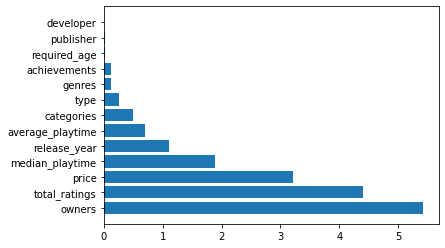

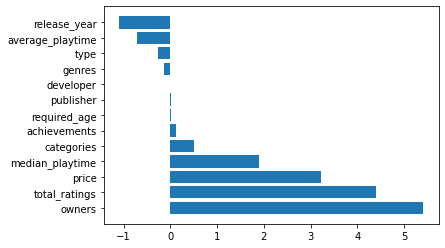

<a id='section_4.3'></a>

## 4.3 Naive Bayes

In [ ]:
# Naive Bayes Classification
# Reference Code: https://github.com/ApoorvRusia/Naive-Bayes-classification-on-Iris-dataset/blob/master/Naiye%20Bayes%20classification%20application.ipynb

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#Spliting the dataset in independent and dependent variables
X = df.iloc[:,:4].values
y = df['rating'].values

In [ ]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 82)

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 82)

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 82)

In [ ]:
# Feature Scaling to bring the variable in a single scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Fitting Naive Bayes Classification to the Training set with linear kernel
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

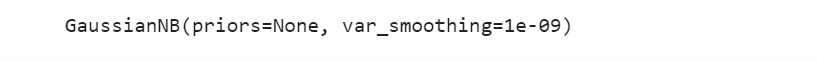

In [ ]:
# Predicting the Test set results
y_pred = nvclassifier.predict(X_test)
print(y_pred)

[0. 0. 0. ... 0. 0. 0.]


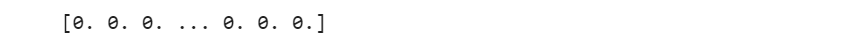

In [ ]:

#lets see the actual and predicted value side by side
y_compare = np.vstack((y_test,y_pred)).T
#actual value on the left side and predicted value on the right hand side
#printing the top 5 values
y_compare[:5,:]

array([[1., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

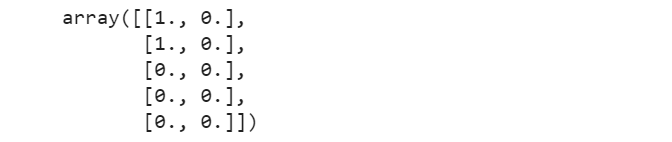

In [ ]:

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3446   58]
 [1656   56]]


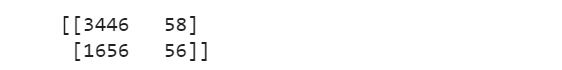

In [ ]:
#finding accuracy from the confusion matrix.
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print ('\n\nAccuracy of the Naive Bayes Clasification is: ', corrPred/(cm.sum()))

Correct predictions:  3502
False predictions 1714


Accuracy of the Naive Bayes Clasification is:  0.6713957055214724


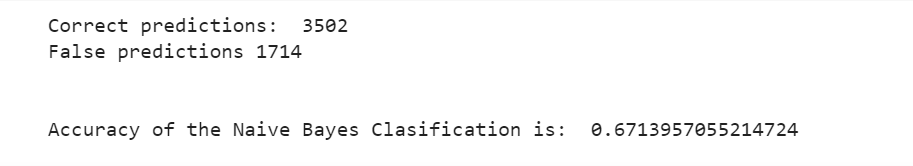

<a id='section_5'></a>
# 5 . Model Comparison

<a id='section_5.1'></a>
## 5.1 Final Models and Evaluation

### Train and Test splits

In [ ]:
#creating the dataset

#X= df.drop(['rating','frating'],axis=1) # Features - Using all features other than our classifier rating
X= df.drop(['rating','frating','median_playtime','average_playtime','type','required_age'],axis=1) # Features - Using all features other than our classifier rating
y= df['rating']  # Labels

# Hold out
# Split dataset into training set and test set
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0) 
# 80% training and 20% test
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.2,random_state=0)
# 90% training and 10% test
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.1,random_state=0)

In [ ]:
#Scaled dataset for SVM

#Scaling the dataset
scaler = MinMaxScaler()
df_SVM = df
df_SVM[df_SVM.columns] = scaler.fit_transform(df_SVM[df_SVM.columns])

Xs= df_SVM.drop(['rating','frating','type','required_age'],axis=1) # Features - Using all features other than our classifier rating
ys= df_SVM['rating'] 
# 70% training and 30% test
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, test_size=0.3,random_state=0) 
# 80% training and 20% test
X1s_train, X1s_test, y1s_train, y1s_test = train_test_split(Xs, ys, test_size=0.2,random_state=0)
# 90% training and 10% test
X2s_train, X2s_test, y2s_train, y2s_test = train_test_split(Xs, ys, test_size=0.1,random_state=0)

### Naive Bayes

In [ ]:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

# Spliting the dataset in independent and dependent variables
X = df.iloc[:,:4].values
y = df['rating'].values

# Splitting the dataset into the Training set and Test set - Test size is 10%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 82)
# Splitting the dataset into the Training set and Test set - Test size is 20%
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size = 0.20, random_state = 82)
# Splitting the dataset into the Training set and Test set - Test size is 30%
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size = 0.30, random_state = 82)

In [ ]:
# Reference: https://scikit-learn.org/stable/auto_examples/calibration/plot_compare_calibration.html?highlight=naive%20bayes%20plot

# Creating classifier
gnb = GaussianNB()
gnb1 = gnb
gnb2 = gnb

# Classifer fit
gnb.fit(X_train, y_train)
gnb1.fit(X1_train, y1_train)
gnb2.fit(X2_train, y2_train)

# Predict the response for test dataset
y_pred = gnb.predict(X_test)
y1_pred = gnb1.predict(X1_test)
y2_pred = gnb2.predict(X2_test)

In [ ]:
#Comparision of the results
print("70/30 split\n\n",classification_report(y_test, y_pred))
print("Accuracy Test Data:",metrics.f1_score(y_test, y_pred))

print("\n\n80/20 split\n\n",classification_report(y1_test, y1_pred))
print("Accuracy Test Data:",metrics.f1_score(y1_test, y1_pred))

print("\n\n90/10 split\n\n",classification_report(y2_test, y2_pred))
print("Accuracy Test Data:",metrics.f1_score(y2_test, y2_pred))



70/30 split

               precision    recall  f1-score   support

         0.0       0.67      0.98      0.80      1739
         1.0       0.50      0.03      0.06       869

    accuracy                           0.67      2608
   macro avg       0.59      0.51      0.43      2608
weighted avg       0.61      0.67      0.55      2608

Accuracy Test Data: 0.06256742179072276


80/20 split

               precision    recall  f1-score   support

         0.0       0.68      0.98      0.80      3504
         1.0       0.49      0.03      0.06      1712

    accuracy                           0.67      5216
   macro avg       0.58      0.51      0.43      5216
weighted avg       0.61      0.67      0.56      5216

Accuracy Test Data: 0.06133625410733844


90/10 split

               precision    recall  f1-score   support

         0.0       0.68      0.98      0.80      5252
         1.0       0.52      0.03      0.06      2572

    accuracy                           0.67      7824
  

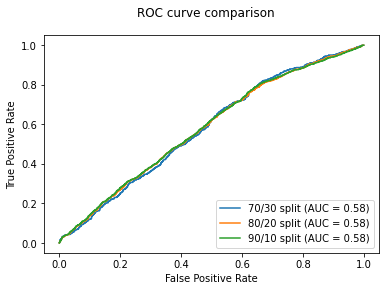

In [ ]:
rfc_disp = metrics.plot_roc_curve(gnb, X_test, y_test,name="70/30 split")
rfc1_disp = metrics.plot_roc_curve(gnb1, X1_test, y1_test, ax=rfc_disp.ax_,name="80/20 split")
rfc2_disp = metrics.plot_roc_curve(gnb2, X2_test, y2_test, ax=rfc_disp.ax_,name="90/10 split")
rfc_disp.figure_.suptitle("ROC curve comparison")

plt.show()

### Random Forest

In [ ]:
#Create a Random Forest Classifier
clf=RandomForestClassifier(
    bootstrap=True, 
    criterion='entropy', 
    max_depth=42, 
    max_features=0.79, 
    min_samples_leaf=3, 
    min_samples_split=3, 
    n_estimators=950, 
    random_state=0,
    n_jobs=-1
    )

clf1=clf
clf2=clf

#Train the model using the training sets 
clf.fit(X_train,y_train)
clf1.fit(X1_train,y1_train)
clf2.fit(X2_train,y2_train)

y_pred=clf.predict(X_test)
y1_pred=clf.predict(X1_test)
y2_pred=clf.predict(X2_test)

y_pred2=clf.predict(X_train)
y1_pred2=clf.predict(X1_train)
y2_pred2=clf.predict(X2_train)


In [ ]:
#Comparing the results
print("70/30 split classification report\n\n",classification_report(y_test, y_pred))
print("Accuracy Training Data:",metrics.f1_score(y_train, y_pred2))
print("Accuracy Test Data:",metrics.f1_score(y_test, y_pred))

print("\n\n80/20 split classification report\n\n",classification_report(y1_test, y1_pred))
print("Accuracy Training Data:",metrics.f1_score(y1_train, y1_pred2))
print("Accuracy Test Data:",metrics.f1_score(y1_test, y1_pred))

print("\n\n90/10 split classification report\n\n",classification_report(y2_test, y2_pred))
print("Accuracy Training Data:",metrics.f1_score(y2_train, y2_pred2))
print("Accuracy Test Data:",metrics.f1_score(y2_test, y2_pred))

In [ ]:
#Compare the effect of different train test splits on the training data
#Based on code from https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_iris.html

rfc_disp = metrics.plot_roc_curve(clf, X_test, y_test,name="70/30 split")
rfc1_disp = metrics.plot_roc_curve(clf1, X1_test, y1_test, ax=rfc_disp.ax_,name="80/20 split")
rfc2_disp = metrics.plot_roc_curve(clf2, X2_test, y2_test, ax=rfc_disp.ax_,name="90/10 split")
rfc_disp.figure_.suptitle("ROC curve comparison")

plt.show()

In [ ]:
#validating results using stratified k-fold cross validation
from sklearn.model_selection import cross_val_score

print("70/30 split")
score = cross_val_score(clf, X_train, y_train, cv= 5, scoring="accuracy",n_jobs=-1)
print("Training data")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')
score = cross_val_score(clf, X_test, y_test, cv= 5, scoring="accuracy",n_jobs=-1)
print("Testing data")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

print("80/20 split")

score = cross_val_score(clf, X1_train, y1_train, cv= 5, scoring="f1",n_jobs=-1)
print("Training data")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')
score = cross_val_score(clf, X1_test, y1_test, cv= 5, scoring="f1",n_jobs=-1)
print("Testing data")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

print("90/10 split")
score = cross_val_score(clf, X2_train, y2_train, cv= 5, scoring="f1",n_jobs=-1)
print("Training data")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')
score = cross_val_score(clf, X2_test, y2_test, cv= 5, scoring="f1",n_jobs=-1)
print("Testing data")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

70/30 split


KeyboardInterrupt: ignored

### SVM

In [ ]:
#Final Model

#Create models
svm = LinearSVC(random_state=0, max_iter=10000,class_weight='balanced',C=1)
svm1 = svm
svm2 = svm

#Fit models
svm.fit(Xs_train, ys_train)
svm1.fit(X1s_train, y1s_train)
svm2.fit(X2s_train, y2s_train)

#Predict the response for test dataset
y_pred = svm.predict(Xs_test)
y1_pred = svm1.predict(X1s_test)
y2_pred = svm2.predict(X2s_test)

In [ ]:
#Comparing the results
print("70/30 split classification report\n\n",classification_report(ys_test, y_pred))
print("Accuracy Test Data:",metrics.f1_score(ys_test, y_pred))

print("\n\n80/20 split classification report\n\n",classification_report(y1_test, y1_pred))
print("Accuracy Test Data:",metrics.f1_score(y1s_test, y1_pred))

print("\n\n90/10 split classification report\n\n",classification_report(y2_test, y2_pred))
print("Accuracy Test Data:",metrics.f1_score(y2s_test, y2_pred))

70/30 split classification report

               precision    recall  f1-score   support

         0.0       0.77      0.64      0.70      5244
         1.0       0.45      0.61      0.52      2580

    accuracy                           0.63      7824
   macro avg       0.61      0.62      0.61      7824
weighted avg       0.67      0.63      0.64      7824

Accuracy Test Data: 0.5209778658738025


80/20 split classification report

               precision    recall  f1-score   support

         0.0       0.67      0.56      0.61      3504
         1.0       0.33      0.43      0.37      1712

    accuracy                           0.52      5216
   macro avg       0.50      0.50      0.49      5216
weighted avg       0.56      0.52      0.53      5216

Accuracy Test Data: 0.5227841762643965


ValueError: ignored

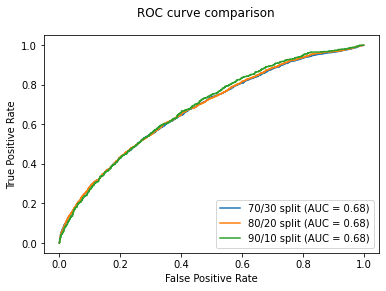

In [ ]:
rfc_disp = metrics.plot_roc_curve(svm, Xs_test, ys_test,name="70/30 split")
rfc1_disp = metrics.plot_roc_curve(svm1, X1s_test, y1s_test, ax=rfc_disp.ax_,name="80/20 split")
rfc2_disp = metrics.plot_roc_curve(svm2, X2s_test, y2s_test, ax=rfc_disp.ax_,name="90/10 split")
rfc_disp.figure_.suptitle("ROC curve comparison")

plt.show()

<a id='section_5.2'></a>
## 5.2 Comparison

### AUC-ROC Curves

In [ ]:
#Based on code from https://stackoverflow.com/questions/42894871/how-to-plot-multiple-roc-curves-in-one-plot-with-legend-and-auc-scores-in-python/42895367

 
plt.figure()
plt.figure(figsize=(20,10)) 
# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Random Forest',
    'model': RandomForestClassifier(   bootstrap=True,    criterion='entropy',     max_depth=42,     max_features=0.79,     min_samples_leaf=3,     
                                    min_samples_split=3,     n_estimators=950,     random_state=0,    n_jobs=-1),
},
{
    'label': 'Naive Bayes',
    'model': GaussianNB(),
},
{
    'label': 'SVM',
    'model': LinearSVC(random_state=0, max_iter=10000,class_weight='balanced',C=1),
}

]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    if m['label'] == 'SVM':
      X_train, y_train, X_test, y_test = Xs_train, ys_train, Xs_test, ys_test
      model = CalibratedClassifierCV(model)
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
    # Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    # Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    # Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (AUC = %0.2f)' % (m['label'], auc))

# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

In [ ]:
#80/20 split
 
plt.figure()
plt.figure(figsize=(20,10)) 
# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Random Forest',
    'model': RandomForestClassifier(   bootstrap=True,    criterion='entropy',     max_depth=42,     max_features=0.79,     min_samples_leaf=3,     
                                    min_samples_split=3,     n_estimators=950,     random_state=0,    n_jobs=-1),
},
{
    'label': 'Naive Bayes',
    'model': GaussianNB(),
},
{
    'label': 'SVM',
    'model': LinearSVC(random_state=0, max_iter=10000,class_weight='balanced',C=1),
}

]

#80/20 split
X_train, y_train, X_test, y_test = X1_train, y1_train, X1_test, y1_test
Xs_train, ys_train, Xs_test, ys_test = X1s_train, y1s_train, X1s_test, y1s_test

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    if m['label'] == 'SVM':
      X_train, y_train, X_test, y_test = Xs_train, ys_train, Xs_test, ys_test
      model = CalibratedClassifierCV(model) 
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
    # Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    # Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    # Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (AUC = %0.2f)' % (m['label'], auc))

# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

In [ ]:
#90/10 split
 
plt.figure()
plt.figure(figsize=(20,10)) 
# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Random Forest',
    'model': RandomForestClassifier(   bootstrap=True,    criterion='entropy',     max_depth=42,     max_features=0.79,     min_samples_leaf=3,     
                                    min_samples_split=3,     n_estimators=950,     random_state=0,    n_jobs=-1),
},
{
    'label': 'Naive Bayes',
    'model': GaussianNB(),
},
{
    'label': 'SVM',
    'model': LinearSVC(random_state=0, max_iter=10000,class_weight='balanced',C=1),
}

]

#90/10 split
X_train, y_train, X_test, y_test = X2_train, y2_train, X2_test, y2_test
Xs_train, ys_train, Xs_test, ys_test = X2s_train, y2s_train, X2s_test, y2s_test

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    if m['label'] == 'SVM':
      X_train, y_train, X_test, y_test = Xs_train, ys_train, Xs_test, ys_test
      model = CalibratedClassifierCV(model) 
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
    # Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    # Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    # Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (AUC = %0.2f)' % (m['label'], auc))

# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

<a id='ref'></a>
# References

- ‌andersdrachen (2014). The Playtime Principle: Mining 5 Billion Hours of Play on Steam. [online] Game Analytics Resources. Available at: https://andersdrachen.com/2014/07/07/the-playtime-principle-mining-5-billion-hours-of-play-on-steam/ [Accessed 20 Apr. 2021].

- Breiman, L. 2001. Random Forests. Machine Learning, 45(1), p.5-32.

- https://www.facebook.com/MachineLearningMastery (2018). How to Remove Outliers for Machine Learning. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/#:~:text=Sometimes%20a%20dataset%20can%20contain,even%20removing%20these%20outlier%20values [Accessed 20 Apr. 2021].

- Ilyas, I., & Chu, X. (2019). Data Cleaning. Association for Computing Machinery.

- Jonduke (2020). Analyzing Steam Reviews and Users Data - Jonduke - Medium. [online] Medium. Available at: https://medium.com/@jonduke90/analyzing-steam-reviews-and-users-data-7a4ff3c5ce1a [Accessed 20 Apr. 2021].

- Kazil, J., and Jarmul, K. 2016. . Data Wrangling with Python: Tips and Tools to Make Your Life Easier. O'Reilly Media, Inc..

- Koo Ping Shung (2018). Accuracy, Precision, Recall or F1? - Towards Data Science. [online] Medium. Available at: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9 [Accessed 22 Apr. 2021].

- Kuhn, M. & Johnson, K. (2013), 'Applied predictive modeling' 'Applied Predictive Modeling' , Springer , New York, NY .

- Kunal Tiwari, Krishna Mehta, Nitin Jain, R. Tiwari, & Gaurav Kanda (2007). Selecting the Appropriate Outlier Treatment for Common Industry Applications

- Raileanu, K. 2004. Theoretical Comparison between the Gini Index and Information Gain Criteria. Annals of Mathematics and Artificial Intelligence, 41(1), p.77-93.

- Scikit-learn.org. (2012). 1.11. Ensemble methods — scikit-learn 0.24.1 documentation. [online] Available at: https://scikit-learn.org/stable/modules/ensemble.html#random-forest-parameters [Accessed 20 Apr. 2021].

- Scikit-learn.org. (2020). sklearn.model_selection.GridSearchCV — scikit-learn 0.24.1 documentation. [online] Available at: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV [Accessed 21 Apr. 2021].

- SteamSpy - All the data about Steam games. (2020). 2020 - Year Stats -. [online] Available at: https://steamspy.com/year/2020 [Accessed 20 Apr. 2021].
‌
‌
